In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
df = pd.read_csv('/content/ushape (1).csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.tail()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0
98,-1.296818,0.184147,0.0


In [ ]:
df.shape

(99, 3)

In [ ]:
df = df.rename(columns = {"3.159499363321345566e-02":"x","9.869877579082642072e-01":"y","0.000000000000000000e+00":"labels"})

In [ ]:
x = df.drop(columns = ['labels'],axis=1)
y = df['labels']

In [ ]:
print(x)

           x         y
0   2.115098 -0.046244
1   0.882490 -0.075756
2  -0.055144 -0.037332
3   0.829545 -0.539321
4   2.112857  0.662084
..       ...       ...
94  1.699453  0.587720
95  0.218623 -0.652521
96  0.952914 -0.419766
97 -1.318500  0.423112
98 -1.296818  0.184147

[99 rows x 2 columns]


In [ ]:
print(y)

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    0.0
98    0.0
Name: labels, Length: 99, dtype: float64


In [ ]:
# model training
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2, kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.8635274 , -1.3855373 , -1.1109829 , -1.0566697 ,  0.8291334 ,
          0.8194264 , -0.52686954, -1.3858004 , -0.9888215 ,  0.99637854],
        [ 0.39699566, -1.4242314 ,  1.3294138 , -0.24242413, -0.4371724 ,
         -1.1461501 ,  1.0273834 , -1.1593778 , -0.5856546 ,  0.26613915]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 6.20348096e-01, -1.42573237e-01,  7.10006356e-02,
         -1.20663226e-01,  2.08520293e-02, -3.44005346e-01,
          7.26599693e-02, -2.23331392e-01,  4.70885992e-01,
         -4.36272621e-02],
        [-1.40617907e-01,  7.58677840e-01,  5.43328881e-01,
          3.21099877e-01, -5.68414688e-01,  9.37020779e-03,
          2.54379511e-01,  5.28115153e-01,  4.27159309e-01,
         -5.69846511e-01],
        [-6.07927680e-01, -4.07245636e-01, -6.11880422e-01,
         -6.22579932e-01, -2.15147376e-01, -7.25688338e-01,
         -5.31442881e-01, -5.81901550e-01,  1.32984579e-01,
         -5.3213965

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(6/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(6/2)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(6/2)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(6/2)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(6/2)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.4851 - loss: 9.7616 - val_accuracy: 0.5000 - val_loss: 8.4838
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5007 - loss: 7.4414 - val_accuracy: 0.5000 - val_loss: 6.5696
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5461 - loss: 6.0603 - val_accuracy: 0.5500 - val_loss: 5.0858
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4641 - loss: 5.9221 - val_accuracy: 0.5500 - val_loss: 3.9839
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5305 - loss: 3.7838 - val_accuracy: 0.5500 - val_loss: 3.0514
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5251 - loss: 2.9712 - val_accuracy: 0.5500 - val_loss: 2.0830
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5679 - loss: 2.9419 - val_accuracy: 0.6500 - val_loss: 1.2183
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6308 - loss: 2.0141 - val_accuracy: 0.7500 - val_loss

In [ ]:
model.get_weights()

[array([[ 2.5249555 , -0.01545403,  3.6390398 , -1.6603161 , -0.8703158 ,
         -0.5191397 ,  5.355438  ,  3.2080426 ,  0.5587002 , -2.3133345 ],
        [-1.7112066 ,  0.41936916, -0.42941833,  1.1914402 , -0.6248231 ,
          0.27940357,  0.8997554 , -1.4404045 , -1.2652415 , -1.9028097 ]],
       dtype=float32),
 array([-0.01782652,  0.01797656, -0.00687222, -0.0773722 , -0.07084443,
        -0.0824689 , -0.10326379,  0.03866703,  0.02593544,  0.02820336],
       dtype=float32),
 array([[-1.3695036 ,  2.9625924 ,  0.711107  ,  4.5980835 ,  1.4273905 ,
          1.1491699 ,  0.9292231 ,  0.5595732 ,  1.078605  , -0.04046062],
        [ 0.9007753 , -2.7383137 ,  3.0335674 ,  0.8716389 , -2.427592  ,
         -0.2903391 ,  0.9502747 ,  0.5941048 , -0.7284563 ,  2.8963957 ],
        [ 4.287529  , -1.6603808 , -4.1135364 ,  2.1130004 , -1.8696187 ,
          0.9241716 , -0.8363687 , -2.1226044 ,  0.19079788, -2.0166736 ],
        [-0.13004607,  1.3956525 ,  0.13849184, -1.131672  , 

In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

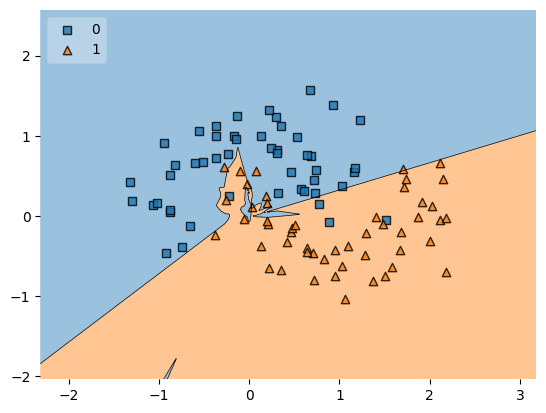

In [ ]:
plot_decision_regions(x.values,y.astype('int').values,clf=model,legend=2)